Income_Group
Low Income     50
High Income    50
Name: count, dtype: int64

MEAN HUMAN-ERROR CRASH RATES
                                rate_NO_FACTOR  rate_DISTRACTED  rate_DRUG  \
Income_Group Intersection_Type                                               
High Income  Non-Roundabout           0.595085         0.082706   0.041586   
             Roundabout               0.363659         0.047857   0.022613   
Low Income   Non-Roundabout           0.607657         0.093300   0.034939   
             Roundabout               0.291168         0.056797   0.027309   

                                rate_ALCOHOL  rate_SPEEDING  rate_HITNRUN  
Income_Group Intersection_Type                                             
High Income  Non-Roundabout         0.048077       0.124622      0.312501  
             Roundabout             0.031367       0.090754      0.158455  
Low Income   Non-Roundabout         0.047372       0.118550      0.292318  
             Roundabout             0.029123  

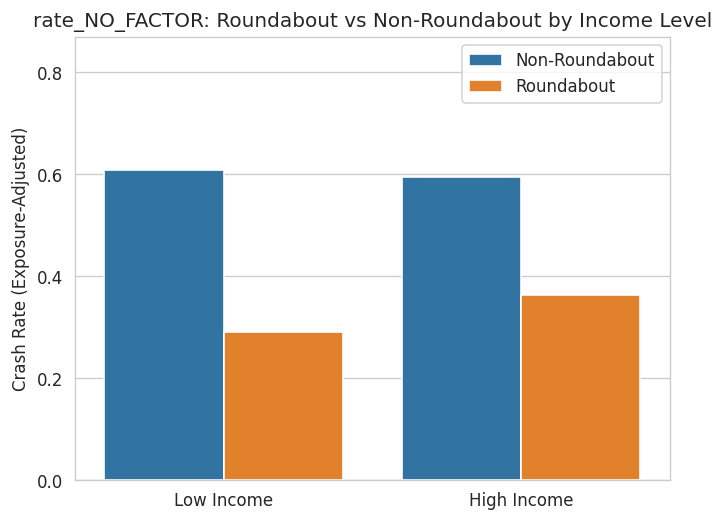

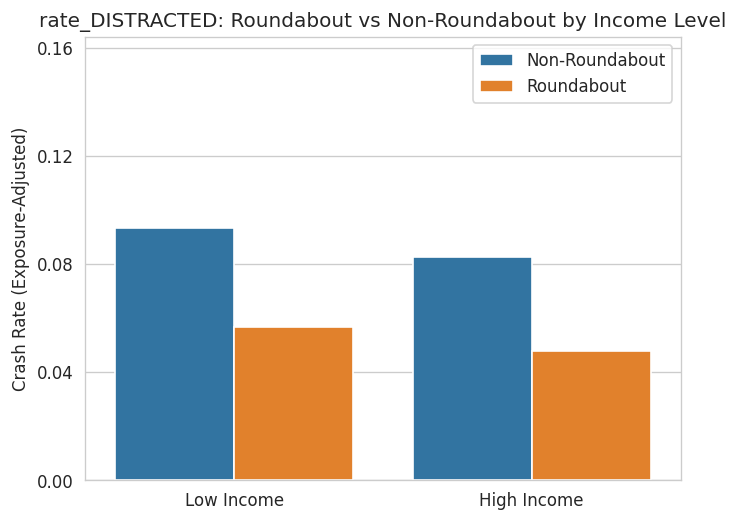

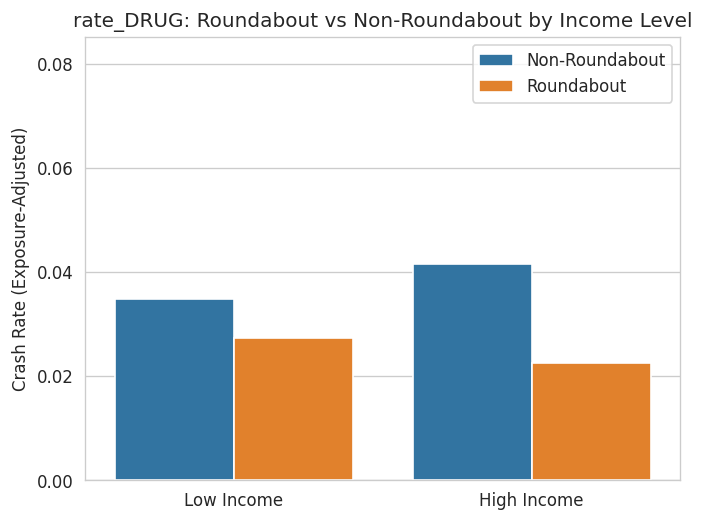

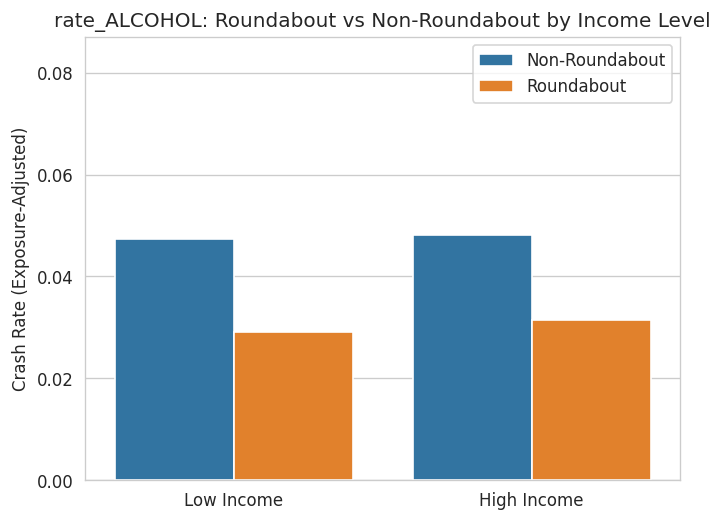

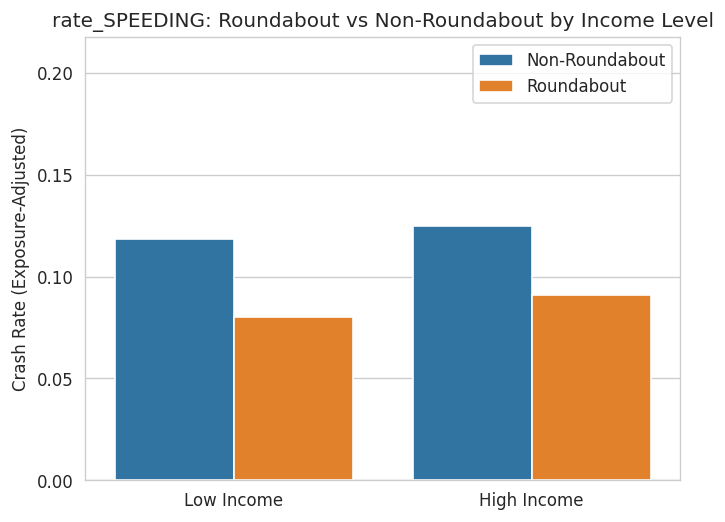

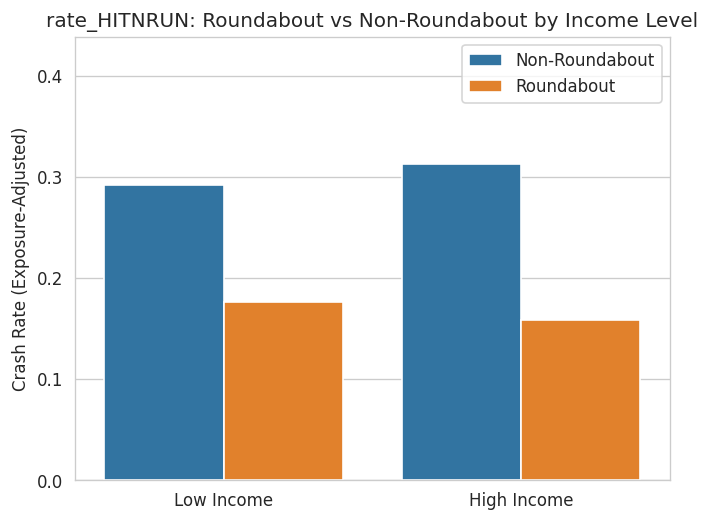

In [22]:
# ROUNDABOUTS, HUMAN ERROR CRASHES, & INCOME COMPARISON

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 120
sns.set_style("whitegrid")

# 1. LOAD DATA

# Upload both CSVs to Colab before running
sim = pd.read_csv("Similiar_intersections.csv")
rnd = pd.read_csv("Roundabouts.csv")

sim["Intersection_Type"] = "Non-Roundabout"
rnd["Intersection_Type"] = "Roundabout"

df = pd.concat([sim, rnd], ignore_index=True)

# 2. DEFINE HUMAN-ERROR CRASH VARIABLES

human_error_vars = [
    "rate_NO_FACTOR",
    "rate_DISTRACTED",
    "rate_DRUG",
    "rate_ALCOHOL",
    "rate_SPEEDING",
    "rate_HITNRUN"
]

# Keep only columns that exist
human_error_vars = [v for v in human_error_vars if v in df.columns]


# 3. DEFINE INCOME GROUPS


# Bottom 25% = Low income
# Top 25% = High income
low_thresh = df["Median_HH_Income"].quantile(0.25)
high_thresh = df["Median_HH_Income"].quantile(0.75)

def income_group(x):
    if x <= low_thresh:
        return "Low Income"
    elif x >= high_thresh:
        return "High Income"
    else:
        return "Middle Income"

df["Income_Group"] = df["Median_HH_Income"].apply(income_group)

# Keep only low and high income for clean comparison
df_lh = df[df["Income_Group"].isin(["Low Income", "High Income"])]

print(df_lh["Income_Group"].value_counts())


# 4. MEAN COMPARISON TABLE


mean_table = (
    df_lh
    .groupby(["Income_Group", "Intersection_Type"])[human_error_vars]
    .mean()
)

print("\nMEAN HUMAN-ERROR CRASH RATES")
print(mean_table)

# 5. BAR PLOTS: ROUNDABOUT VS NON-ROUNDABOUT
#    SEPARATED BY INCOME GROUP

for var in human_error_vars:
    plt.figure()
    sns.barplot(
        data=df_lh,
        x="Income_Group",
        y=var,
        hue="Intersection_Type",
        errorbar=None # Updated from ci=None
    )
    plt.title(f"{var}: Roundabout vs Non-Roundabout by Income Level")
    plt.ylabel("Crash Rate (Exposure-Adjusted)")
    plt.xlabel("")
    plt.legend(title="")
    plt.ylim(0, df_lh[var].max() * 1.1) # Set y-axis to start at 0 and go slightly above max
    plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5)) # Adjust increments
    plt.show()



In [21]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")
print(f"Matplotlib Version: {mpl.__version__}")

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas Version: 2.2.2
NumPy Version: 2.0.2
Seaborn Version: 0.13.2
Matplotlib Version: 3.10.0
